# Recommend Locations for New Business

## 1. Cluster the Business Venues

### 1.1 Import the raw check-in dataset

In [1]:
import pandas as pd
import numpy as np
import math

checkin = pd.read_csv("nyc-checkin.csv")
checkin = checkin.drop(['timezoneOffset', 'utcTimestamp'], axis=1)
checkin

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375


### 1.2 Implement k-means on all business venues

In [2]:
venues = checkin.drop_duplicates("venueId")

In [5]:
from sklearn.cluster import KMeans
ven_lat_lng = venues[['latitude', 'longitude']].values
k = 300
kmeans = KMeans(n_clusters=k, random_state=1).fit(ven_lat_lng)
label = kmeans.labels_
label = label.reshape(label.shape[0], 1)
cluster = np.concatenate((venues, label), axis=1)
cluster_df = pd.DataFrame({'venueId': cluster[:,1], 'latitude': cluster[:,4],'longitude': cluster[:,5], 'label':cluster[:,-1]})

### 1.3 Plot the clustering data

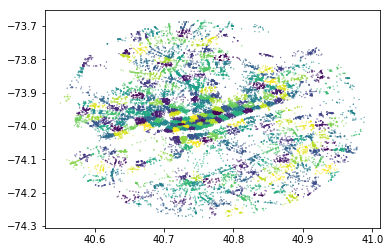

In [6]:
#plot the scatter graph
import matplotlib.pyplot as pyplot
pyplot.scatter(cluster_df['latitude'].values, cluster_df['longitude'].values, c = cluster_df['label'],s=0.1)
pyplot.show()

### 1.4 Add clustering result to dataset

In [7]:
#Save cluster result to a csv file
cluster_df.to_csv("clustering_neighborhood.csv")
#create a map from venueId to cluster result
ven_label = cluster_df.set_index('venueId').T.to_dict('label')
cluster_id = []
for index, row in checkin.iterrows():
    cluster_id.append(ven_label[row['venueId']][0])

In [8]:
checkin["neighborhood_id"] = cluster_id
checkin.to_csv("checkin_neighborhood.csv")
checkin

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,104
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,228
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,23
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,62
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,261
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,104
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,44


## 2. Pick up neighborhood using Collaborative Neighborhood Filtering (CNF)

### 2.1 Preparation, Construct Neighborhood-Venues Matrix

In [9]:
"""
convert dataset to dictionary:
N_CAT matrix and GA_MAT
first transform dataset to certain format

neighbor_cate_checkin_dic:
{   
 neighborhood_id: {
     venueCategoryId: count
 }   
}

neighbor_cate_exist_dic:
{   
 neighborhood_id: {
     venueCategoryId
 }   
}

"""
# Several Tune Parameters:
# Number of Similar Neighborhoods
Sim = 5
predic_category = "Chinese Restaurant"
top_n = 5

# Map from neighborhood to category checkin number
neighbor_cate_checkin_dic = {}
# Map from neighborhood to category existence
neighbor_cate_exist_dic = {}

for index, row in checkin.iterrows():
    neighbor = row["neighborhood_id"]
    if neighbor not in neighbor_cate_checkin_dic:
        neighbor_cate_checkin_dic[neighbor] = {}
        neighbor_cate_exist_dic[neighbor] = set()
    category = row["venueCategoryId"]
    if category not in neighbor_cate_checkin_dic[neighbor]:
        neighbor_cate_checkin_dic[neighbor][category] = 1
        neighbor_cate_exist_dic[neighbor].add(category)
    else:
        neighbor_cate_checkin_dic[neighbor][category] += 1

In [10]:
# Map for categoryid and category
categoryid_category = checkin[['venueCategoryId', 'venueCategory']].drop_duplicates("venueCategoryId")
categoryid_category_dic = categoryid_category.set_index("venueCategoryId").T.to_dict("list")
category_categoryid_dic = categoryid_category.set_index('venueCategory').T.to_dict("list")

# Map from neighborhood to category count
neighbor_cate_count_dic = {}
for index, row in checkin[['neighborhood_id', 'venueCategory', 'venueCategoryId']].drop_duplicates("venueCategoryId").iterrows():
    n = row['neighborhood_id']
    if n not in neighbor_cate_count_dic:
        neighbor_cate_count_dic[n] = {}
    c = row['venueCategory']
    if c not in neighbor_cate_count_dic[n]:
        neighbor_cate_count_dic[n][c] = 1
    else:
        neighbor_cate_count_dic[n][c] += 1

/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:882: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  "columns will be omitted.", UserWarning)


In [11]:
'''
Construct N_CAT matrix
First get a map from business venues to business categories.

venue_category_dic format:
{

    venuesId : { venueCategoryId: ""}
}
'''
venue_category = checkin[['venueId', 'venueCategoryId']].drop_duplicates('venueId')
venue_category_dic = venue_category.set_index("venueId").T.to_dict("list")

In [14]:
# create a empty N_CAT Matrix
k = 300 # Number of cluster
n_cat = pd.DataFrame(0, index=range(k), columns=list(set(categoryid_category['venueCategory'])))
# Map from categoriy to column number
cate_col_dic = {}
count = 0
for c in categoryid_category['venueCategory']:
    cate_col_dic[c] = count
    count += 1

In [15]:
# Fill the N_CAT Matrix
for index, row in n_cat.iterrows():
    if index in neighbor_cate_exist_dic:
        for cate_id in neighbor_cate_exist_dic[index]:
            category = categoryid_category_dic[cate_id]
            n_cat.ix[index, category] = 1
n_cat

,Australian Restaurant,University,Bar,Salad Place,American Restaurant,Soup Place,Brazilian Restaurant,Turkish Restaurant,Restaurant,Flea Market,...,Breakfast Spot,College Theater,Miscellaneous Shop,Spiritual Center,Food & Drink Shop,Zoo,Fried Chicken Joint,Garden,Middle School,Art Gallery
0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,0,0,1,0,1,1,0,1,1,1,...,0,0,1,1,1,0,0,0,0,1
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6,1,1,1,1,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### 2.2 Find similar Neighborhoods for each Neighborhood (using N_CAT matrix)

#### 2.2.1 Define distance metrics for similarity

In [16]:
def euclidean_distance(index):
    return np.linalg.norm(n_cat.values[index] - n_cat.values, axis=1)

def manhattan_distance(index):
    return np.linalg.norm(n_cat.values[index] - n_cat.values, ord=1, axis=1)

def jaccard_index(index, category):
    temp = n_cat.drop(category, axis=1).values
    result = []
    for row in temp:
        dividor = 1.0 * np.sum(np.logical_and(temp[index], row))
        if dividor == 0:
            result.append(0)
        else:
            jaccard = 1.0 * np.sum(np.logical_and(temp[index], row)) / np.sum(np.logical_or(temp[index], row))
            result.append(jaccard)
            
    return np.array(result)

#### 2.2.2 Define GA_MAT(likelihood) and Total Likelihood

In [17]:
# Different GA_MAT value calculation Functions

# Use check-in in this category / total check-in in this neighborhood
def cal_likelihood(neighborhood, category):
    try:
        checkin = neighbor_cate_checkin_dic[neighborhood][category_categoryid_dic[category][0]]
    except:
        return 0
    total_checkin = 0
    for cat in neighbor_cate_checkin_dic[neighborhood]:
        total_checkin += neighbor_cate_checkin_dic[neighborhood][cat]
    return 1.0 * checkin / total_checkin

# Use check-in number in this category / total check-in in new york
def cal_likelihood_1(neighborhood, category):
    checkin = neighbor_cate_checkin_dic[neighborhood][category]
    total_checkin = len(checkin)
    return 1.0 * checkin / total_checkin

# Use the number of business venues of this category / total number of venues in this neighborhood.

def cal_likelihood_2(neighborhood, category):
    return neighbor_cate_count_dic[neighborhood][category] / sum(neighbor_cate_count_dic[neighborhood].values())


In [18]:
# Function to calculate Total Likelihood in Equation 6
def L_function(similar_dic, category):
    denominator = sum(similar_dic.values())
    numerator = 0
    for sim in similar_dic:
        likelihood = cal_likelihood(sim, category)
        numerator += similar_dic[sim] * likelihood
    return 1.0 * numerator / denominator

#### 2.2.3 Calculate similarities between similar neighborhoods

In [19]:
# Map from neighborhood to similar neighborhood and (jaccard) distance
similar_neighbor = {}

for n, row in n_cat.iterrows():
    if n not in similar_neighbor:
        similar_neighbor[n] = {}
    # result is jaccard_index to each neiborhood
    result = jaccard_index(n, predic_category)
    sim_group = result.argsort()[::-1][:Sim]
    dis_group = result[sim_group]
    for i in range(len(sim_group)):
        similar_neighbor[n][sim_group[i]] = dis_group[i]
    

#### 2.4 Calculate L function for each neighborhood and give result

In [20]:
L_dic = []
for neighbor, row in n_cat.iterrows():
    L_dic.append(L_function(similar_neighbor[neighbor], predic_category))


In [21]:
# Top n neighborhoods with highest L value
neighbor_result = np.array(L_dic).argsort()[::-1][:top_n]

In [22]:
location_map = kmeans.cluster_centers_
location_map[neighbor_result]

array([[ 40.67605231, -73.87215262],
       [ 40.71593396, -73.99723456],
       [ 40.82253393, -73.89224955],
       [ 40.84999715, -73.91075679],
       [ 40.77936276, -74.23296931]])

#### Then we Get the Final Result!

### 2.3 Find similar Neighborhoods for each Neighborhood (using N_CAT_COUNT matrix)

In [31]:
#TODO IN THE FUTURE
checkin.drop_duplicates('venueCategory')['venueCategory'].to_csv("all_category.csv")

In [32]:
# Get centroids for each neighborhoods
location_map = pd.DataFrame(kmeans.cluster_centers_, columns=['lat','lng'])

In [33]:
location_map.to_csv("centroids_of_neighborhoods.csv")

In [40]:
# Find Competitors in each neighborhood(for Chinese Restaraunts)
competitor = checkin.drop_duplicates("venueId")
competitor_map = {}

for index, row in competitor.iterrows():
    if row['venueCategory'] == "Chinese Restaurant":
        if row['neighborhood_id'] in competitor_map:
            competitor_map[row['neighborhood_id']] += 1
        else:
            competitor_map[row['neighborhood_id']] = 1
    

In [46]:
competitor_col = []
for i in range(k):
    if i in competitor_map:
        competitor_col.append(competitor_map[i])
    else:
        competitor_col.append(0)

In [47]:
competitor_csv = pd.DataFrame(competitor_col,columns=['competitors'])

In [48]:
competitor_csv.to_csv("neighbor_competitors.csv")

In [49]:
pd.DataFrame(L_dic).to_csv('score_for_chinese.csv')

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,neighborhood_id
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,220
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,104
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,228
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,264
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,75
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,23
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,62
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,261
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,104
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,44
